# Урок 2. Метрики качества классификации ч.1

В уроке мы разбирали матрицу ошибок и некоторые метрики, основанные на терминах матрицы ошибок. Здесь же посмотрим, как эти метрики применять на практике и что  по ним можно выяснить.

### 1.1
Выкачайте тренировочный датасет Titanic - train.csv - с сайта [kaggle](https://www.kaggle.com/c/titanic/data). С помощью функции pd.read_csv() загрузите данные в датафрейм. Выведите первые 20 строк и проанализируйте данные: какие колонки присутствуют (более конкретная информация по ним есть на сайте kaggle), каким образом в них обозначены данные и какие типы данных используются (используйте pandas.dtypes). 

In [107]:
import pandas as pd
import numpy as np

In [108]:
df = pd.read_csv('train.csv')

print(f'Type:\n {df.dtypes}')
df.head(20)

# В данных присутствуют такие строки как:
# Survived - индекс выживаемости: 0, 1 (не выжил, выжил)
# Pclass - класс билета: от 0 до 3, где 3 самый лучший
# Name - имя
# Sex - пол: male, female (мужчина, женщина)
# Age - возраст: float
# SibSp - количество братьев и сестер / супругов на борту Титаника: int
# Parch - количество родителей / детей на борту Титаника: int
# Ticket - номер билета
# Fare - пассажирский тариф
# Cabin - номер кабины
# Embarked - Порт погрузки: C = Шербур, Q = Квинстаун, S = Саутгемптон

Type:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 1.2
Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок.

In [109]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.3
Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).

Примечание: для группировки по полу можно использовать метод df.groupby(), который имеет встроенные агрегатные функции (в т.ч. для вычисления медианы).  Для установки пропущенных значений в датасете воспользуйтесь функцией df.apply().

In [110]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))

df['Cabin'].fillna('U', inplace=True)
df['Embarked'].fillna('U', inplace=True)

### 1.4
Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [111]:
print(df.isnull().sum())
df.iloc[6:20, :]



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,U,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,U,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,U,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,U,S


Так как не все классификаторы могут работать с категориальными признаками, в данном случае необходимо заменить их на числовые.

Также можно было бы выделить расширенные признаки, такие как статус пассажира (Mr., Mrs., Miss., Dr., Master. и т.д.), собственный индекс билета, индекс палубы и другие, но здесь ограничимся выбором более простых признаков.

### 1.5
В колонке Sex замените значения на 0, если пол "male", и на 1, если "female". В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно. Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [112]:
sex = []
for i in df['Sex']:
    if i == 'male':
        sex.append(0)
    elif i == 'female':
        sex.append(1)
df['Sex'] = sex

embarked = []
for i in df['Embarked']:
    if i == 'U':
        embarked.append(0)
    elif i == 'S':
        embarked.append(1)
    elif i == 'C':
        embarked.append(2)
    elif i == 'Q':
        embarked.append(3)
df['Embarked'] = embarked
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,U,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,27.0,1,2,W./C. 6607,23.4500,U,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,2


In [113]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,29.0,0,0,8.4583,3
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,1
8,1,3,1,27.0,0,2,11.1333,1
9,1,2,1,14.0,1,0,30.0708,2


### 1.6
Приступим к построению классификаторов. **Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем его равным 17 в каждом из случаев.**

Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 (первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
x = df.drop('Survived', axis=1).values
y = df['Survived'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17)

### 1.7
Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.

**Примечание: в методе ближайших соседей используйте количество соседей, равное 5.**

In [116]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [117]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

In [118]:
# GNB
gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
gnb_pred = gnb_model.predict(x_test)

In [119]:
# DTC
dtc = DecisionTreeClassifier(random_state=17)
dtc_model = dtc.fit(x_train, y_train)
dtc_pred = dtc_model.predict(x_test)

In [120]:
# LR
lr = LogisticRegression(random_state=17)
lr_model = lr.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

Очевидно, в этом случае использовать метрику accuracy, которую мы применяли до этого, не совсем правильно: она не даст верную оценку классификатору, потому как выживших явно меньше, чем погибших.

Вспомним про такие метрики как точность и полнота. Здесь они подойдут хорошо, так как у нас имеются положительный и отрицательный классы, и определить корректно один из них может оказаться более важным .

### 1.8
В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.

1. Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).
2. Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности).
3. Предсказание ухода клиента (1 - клиент ушел, 0 - остался).
4. Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).
5. Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).
6. Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).
7. Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).

Ваш ответ:

1. <br> Точность
2. <br> Полнота
3. <br> Точность
4. <br> Точность
5. <br> Полнота
6. <br> Точность
7. <br> Полнота

### 1.9
Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.

Ответ: считаю что полноту, потому что если мы посчитаем что человек мертв, но он жив, особо сильно это не сыграет на модели


### 1.10
Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall (расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.

In [122]:
from sklearn.metrics import confusion_matrix, recall_score

In [127]:
# по порядку: knn, gnb, dtc, lr

predictions = [knn_pred, gnb_pred, dtc_pred, lr_pred]

for prediction in predictions:
    conf_matrix = confusion_matrix(y_test, prediction)
    _, _, fn, tp = conf_matrix.ravel()
    recall_calculated = tp / (tp + fn)
    recall_true = recall_score(y_test, prediction)
    print(conf_matrix)
    print(f'Recall calculated: {recall_calculated}, recall true: {recall_true}')

[[110  21]
 [ 47  45]]
Recall calculated: 0.4891304347826087, recall true: 0.4891304347826087
[[111  20]
 [ 27  65]]
Recall calculated: 0.7065217391304348, recall true: 0.7065217391304348
[[112  19]
 [ 26  66]]
Recall calculated: 0.717391304347826, recall true: 0.717391304347826
[[114  17]
 [ 28  64]]
Recall calculated: 0.6956521739130435, recall true: 0.6956521739130435


### 1.11
Выберите ту модель, на которой метрика recall давала лучший ответ, и рассчитайте для нее precision, используя встроенную функцию.

In [71]:
from sklearn.metrics import precision_score

In [72]:
# Модель DTC
precision = precision_score(y_test, dtc_pred)
precision

0.7764705882352941

# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [17]:
import pandas as pd
import numpy as np

from sklearn.metrics import precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [287]:
df = pd.read_csv('train.csv')

df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))

df['Cabin'].fillna('U', inplace=True)
df['Embarked'].fillna('U', inplace=True)

sex = []
for i in df['Sex']:
    if i == 'male':
        sex.append(0)
    elif i == 'female':
        sex.append(1)
df['Sex'] = sex

embarked = []
for i in df['Embarked']:
    if i == 'U':
        embarked.append(0)
    elif i == 'S':
        embarked.append(1)
    elif i == 'C':
        embarked.append(2)
    elif i == 'Q':
        embarked.append(3)
df['Embarked'] = embarked

df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [153]:
x = df.drop('Survived', axis=1).values
y = df['Survived'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=17)

In [8]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
knn_pred = knn_model.predict(x_test)

In [12]:
knn_recall = recall_score(y_test, knn_pred)
print(f'recall_score: {knn_recall}')

recall_score: 0.4891304347826087


In [13]:
knn_precision = precision_score(y_test, knn_pred)
print(f'precision_score: {knn_precision}')

precision_score: 0.6818181818181818


In [14]:
f1_knn = (knn_recall + knn_precision) / 2
print(f'f1: {f1_knn}')

f1: 0.5854743083003953


In [16]:
f1_score_knn = f1_score(y_test, knn_pred)
print(f'f1_score: {f1_score_knn}')
# Значения не совпадают

f1_score: 0.5696202531645569


В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [21]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [18]:
# GNB
gnb = GaussianNB()
gnb_model = gnb.fit(x_train, y_train)
gnb_pred = gnb_model.predict(x_test)

In [19]:
# DTC
dtc = DecisionTreeClassifier(random_state=17)
dtc_model = dtc.fit(x_train, y_train)
dtc_pred = dtc_model.predict(x_test)

In [20]:
# LR
lr = LogisticRegression(random_state=17)
lr_model = lr.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

In [24]:
prfs_knn = precision_recall_fscore_support(y_test, knn_pred)
prfs_gnb = precision_recall_fscore_support(y_test, gnb_pred)
prfs_dtc = precision_recall_fscore_support(y_test, dtc_pred)
prfs_lr = precision_recall_fscore_support(y_test, lr_pred)

print(f'precision_recall_fscore_support_KNN: {prfs_knn}')
print(f'precision_recall_fscore_support_GNB: {prfs_gnb}')
print(f'precision_recall_fscore_support_DTC: {prfs_dtc}')
print(f'precision_recall_fscore_support_LR: {prfs_lr}')

precision_recall_fscore_support_KNN: (array([0.70063694, 0.68181818]), array([0.83969466, 0.48913043]), array([0.76388889, 0.56962025]), array([131,  92], dtype=int64))
precision_recall_fscore_support_GNB: (array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92], dtype=int64))
precision_recall_fscore_support_DTC: (array([0.8115942 , 0.77647059]), array([0.85496183, 0.7173913 ]), array([0.83271375, 0.74576271]), array([131,  92], dtype=int64))
precision_recall_fscore_support_LR: (array([0.8028169 , 0.79012346]), array([0.87022901, 0.69565217]), array([0.83516484, 0.73988439]), array([131,  92], dtype=int64))


In [26]:
# KNN
cr_knn = classification_report(y_test, knn_pred)
print(f'classification_report_knn:\n {cr_knn}')

classification_report_knn:
               precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223



In [27]:
# GNB
cr_gnb = classification_report(y_test, gnb_pred)
print(f'classification_report_gnb:\n {cr_gnb}')

classification_report_gnb:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



In [28]:
# DTC
cr_dtc = classification_report(y_test, dtc_pred)
print(f'classification_report_dtc:\n {cr_dtc}')

classification_report_dtc:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       131
           1       0.78      0.72      0.75        92

    accuracy                           0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



In [29]:
# LR
cr_lr = classification_report(y_test, lr_pred)
print(f'classification_report_lr:\n {cr_lr}')

classification_report_lr:
               precision    recall  f1-score   support

           0       0.80      0.87      0.84       131
           1       0.79      0.70      0.74        92

    accuracy                           0.80       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.80      0.80      0.80       223



Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [143]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [144]:
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

for train, test in skf.split(x, y):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train], x[test]
    Y_train, Y_test = y[train], y[test]


In [152]:
Y_train.shape

(713,)

In [146]:
inter = np.logspace(-1, 2, num=500)

In [147]:
lrcv = LogisticRegressionCV(Cs=inter, cv=skf, scoring='roc_auc', random_state=17)

In [154]:
lrcv_model = lrcv.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [129]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Mean CV-auc_roc')

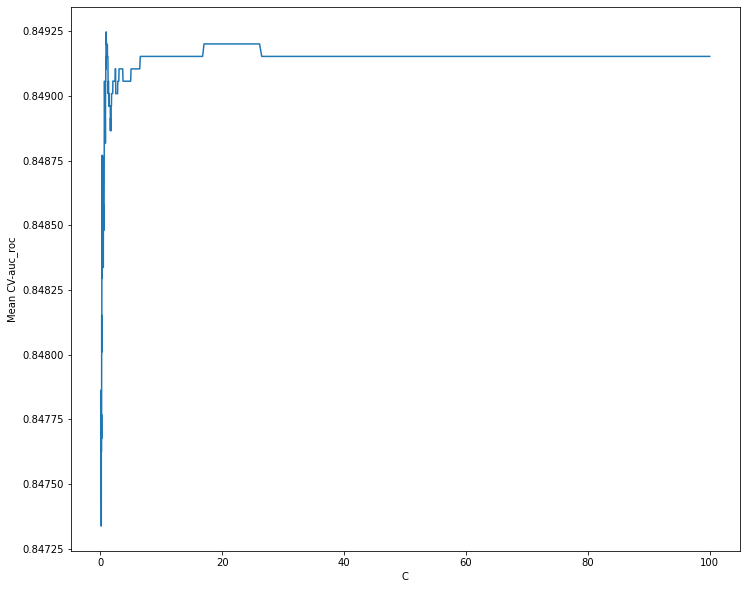

In [156]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.plot(inter, np.mean(lrcv_model.scores_[1], axis=0))
plt.xlabel('C')
plt.ylabel('Mean CV-auc_roc')

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

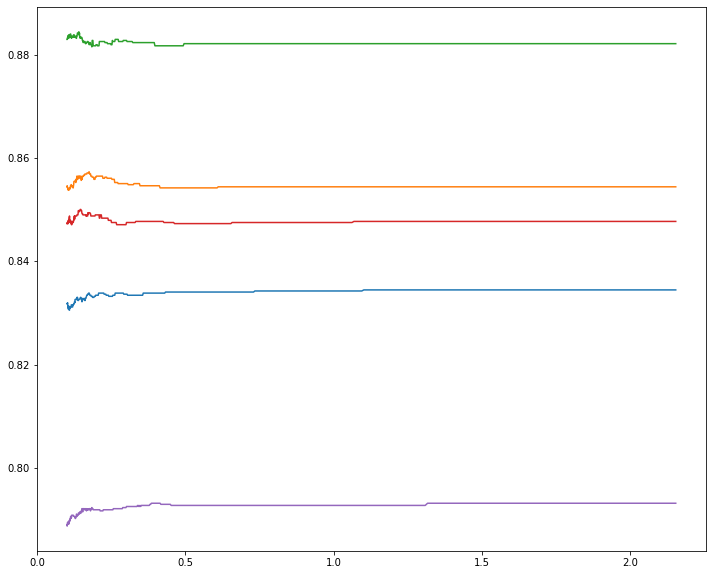

In [271]:
fig, ax = plt.subplots(figsize=(12, 10))
for i in lrcv_scores:
    plt.plot(inter, i)

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [272]:
from sklearn.metrics import roc_auc_score, roc_curve

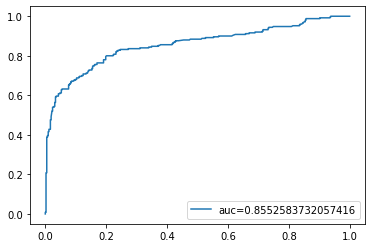

In [ ]:
probas = logit_search.fit(x_train, y_train).predict_proba(x_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

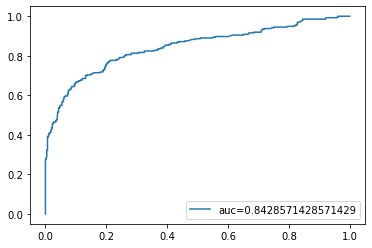

In [292]:
probas = lrcv.fit(X_train, y_train).predict_proba(X_train)
fpr, tpr, _ = roc_curve(y_train, probas[:, 1])
auc = roc_auc_score(y_train, probas[:, 1])
plt.plot(fpr, tpr, label="auc=" + str(auc))
plt.legend(loc=4)

# Урок 6. Многоклассовая классификация.

Посмотрим на примере алгоритма логистической регрессии и метода опорных векторов, как работать с различными методами многоклассовой классификации.

### 1.
Вспомните датасет Wine. Загрузите его, разделите на тренировочную и тестовую выборки (random_state=17), используя только [9, 11, 12] признаки.

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [80]:
wine_dataset = load_wine()
x = wine_dataset.data[:, [9, 11, 12]]
y = wine_dataset.target

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=17)

**Задайте тип кросс-валидации с помощью StratifiedKFold: 5-кратная, random_state=17.**

In [81]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

In [82]:
skf = StratifiedKFold(n_splits=5, random_state=17, shuffle=True)

### 2.
Обучите логистическую регрессию (LogisticRegression) с параметром C по умолчанию и random_state=17. Укажите гиперпараметр multi_class='ovr' - по умолчанию многие классификаторы используют именно его. С помощью cross_val_score сделайте кросс-валидацию (используйте объект skf) и выведите среднюю долю правильных ответов на ней (используйте функцию mean). Отдельно выведите долю правильных ответов на тестовой выборке.

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [87]:
lr = LogisticRegression(C=1.0, random_state=17, multi_class='ovr')
lr_model = lr.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)

cross_val_score_lr = np.mean(cross_val_score(lr, x, y, cv=skf))
accuracy = accuracy_score(y_test, lr_pred)

print(f'Accuracy: {accuracy}')
print(f'cross_val_score: {cross_val_score_lr}')

Accuracy: 0.9111111111111111
cross_val_score: 0.9330158730158731


### 3.
Обучите метод опорных векторов (SVC) с random_state=17 и остальными параметрами по умолчанию. Этот метод при мультиклассовой классификации также использует метод "ovr". Сделайте кросс-валидацию (используйте skf) и, как и в предыдущем пункте, выведите среднюю долю правильных ответов на ней. Отдельно выведите долю правильных ответов на тестовой выборке.

In [73]:
from sklearn.svm import SVC

In [89]:
svc = SVC(random_state=17)
svc_model = svc.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)

cross_val_score_svc = np.mean(cross_val_score(svc, x, y, cv=skf))
accuracy = accuracy_score(y_test, svc_pred)

print(f'Accuracy: {accuracy}')
print(f'cross_val_score: {cross_val_score_svc}')

Accuracy: 0.6222222222222222
cross_val_score: 0.6803174603174603


Как видно из полученной метрики, на тестовой выборке метод с гиперпараметрами по умолчанию работает явно намного хуже логистической регрессии. В целом, SVM достаточно плохо масштабируется на размер обучающего набора данных (как видно, даже с тремя признаками он работает не очень хорошо), но благодаря возможности выбора различных ядер (функций близости, которые помогают разделять данные) и другим гиперпараметрам SVM можно достаточно точно настроить под определенный вид данных. Подробнее на этом останавливаться в контексте данного урока не будем.

### 4.
Для предсказаний обеих моделей постройте матрицу ошибок (confusion matrix) и напишите, какие классы каждая из моделей путает больше всего между собой.

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
cm_lr = confusion_matrix(y_test, lr_pred)
cm_svc = confusion_matrix(y_test, svc_pred)

print(f'LR:\n {cm_lr}')
print(f'SVC:\n {cm_svc}')

# Модель LR путает 2 и 3 классы
# Модель SVC путает 1 и 2 классы

LR:
 [[ 9  0  0]
 [ 0 19  0]
 [ 0  4 13]]
SVC:
 [[ 9  0  0]
 [ 0 19  0]
 [ 2 15  0]]


### 5.
Для каждой модели выведите classification report.

In [97]:
cr_lr = classification_report(y_test, lr_pred)
cr_svc = classification_report(y_test, svc_pred)

print(f'classification_report_lr:\n {cr_lr}')
print(f'classification_report_svc:\n {cr_svc}')

classification_report_lr:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.83      1.00      0.90        19
           2       1.00      0.76      0.87        17

    accuracy                           0.91        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.93      0.91      0.91        45

classification_report_svc:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       0.56      1.00      0.72        19
           2       0.00      0.00      0.00        17

    accuracy                           0.62        45
   macro avg       0.46      0.67      0.54        45
weighted avg       0.40      0.62      0.48        45



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
